9.0 -5 -1.0 5
6.0 -5 -4.0 5


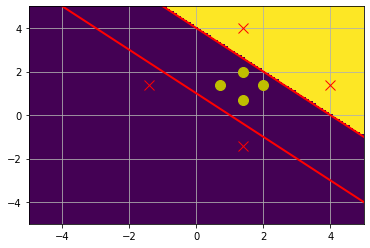

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
def predict(x,w1,w2):
    # Append ones to the input
    x_with_ones=np.vstack((np.ones((1, x.shape[1])), x))
    net1=np.dot(w1,x_with_ones)
    net1[net1>=0]=1
    net1[net1<0]=0
    a1=net1
    a_with_ones=np.vstack((np.ones((1,a1.shape[1])),a1))
    net2=np.dot(w2,a_with_ones)
    net2[net2>0]=1
    net2[net2<=0]=0
    return net2
def plot_line(ax,a,b,c):
    limit=5
    if a:
        y1 = -limit
        x1=-(y1*b+c)/a
        y2 = limit
        x2 = -(y2 * b + c) / a
        # if b:
        #     x2=100
        #     y2=-(x2*a+c)/b
        # else:
        #     y2 = -100
        #     x2=-(y2*b+c)/a

    else:
        x1=-limit
        y1=-c/b
        x2=limit
        y2=-c/b
    print(x1,y1,x2,y2)
    plt.plot(np.array([x1,x2]),np.array([y1,y2]),lw=2,c='r')
    # plt.plot(100*np.array([x1,x2]),100*np.array([y1,y2]),lw=30,c='w',zorder=10)
resolution=100
xs = np.linspace(-5., 5., resolution)
ys = np.linspace(-5., 5., resolution)
xx, yy = np.meshgrid(xs, ys)
# Two nodes on the first layer
# Bias is on the first column
w1=np.array([[-4,1,1],[1,-1,-1]])
# Second layer
#w2=[0,1,1]
w2=[-0.5,1,0] #This is an example of the first layer being correct but the second layer is incorrect
xy=np.vstack((xx.flatten(),yy.flatten()))
z=predict(xy,w1,w2)
zz=z.reshape(xx.shape[0],-1)

fig = plt.figure()
ax = fig.gca()
quad = ax.pcolormesh(xs, ys, zz)
positive = np.array([[4, 1.4], [1.4, 4],[-1.4,1.4],[1.4,-1.4]])
negative = np.array([[2, 1.4], [1.4, 2],[0.7,1.4],[1.4,0.7]])
plt.plot(positive[:, 0], positive[:,1], 'rx', markersize=10)
plt.plot(negative[:, 0], negative[:,1], 'yo', markersize=10)
plot_line(ax,w1[0,1],w1[0,2],w1[0,0])
plot_line(ax,w1[1,1],w1[1,2],w1[1,0])
plt.xlim(-5, 5.0)
plt.ylim(-5, 5.0)
plt.grid(True)
plt.show()